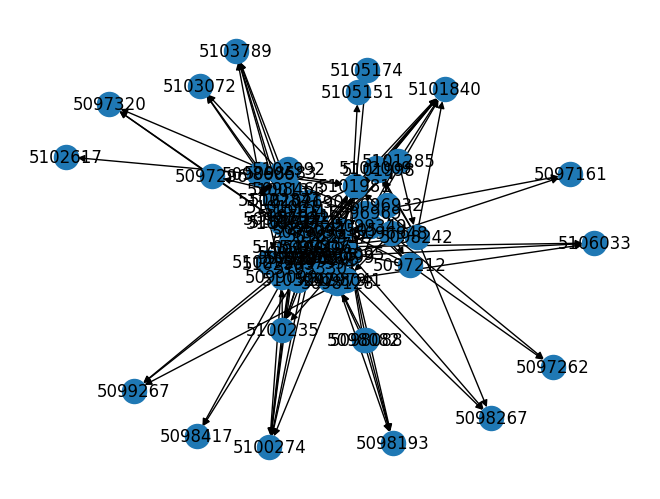

In [7]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import numpy as np
import random

# Read nodes from the CSV file
G = nx.DiGraph()
with open('/Users/coding/Desktop/network_analysis/sna_titanic/Project/Graph/nodes.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        G.add_node(row['Id'], label=row['Label'])

# Read edges from the CSV file
with open('/Users/coding/Desktop/network_analysis/sna_titanic/Project/Graph/edges.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        G.add_edge(row['Source'], row['Target'], weight=int(row['Weight']))


#Innovation Adaptaion Model: Bass Contagion model to model the spread of innovation (how characters change their opinion during the movie and how they are influenced by each other)
#The model is based on the Bass diffusion model, which is a model that describes the adoption of a new behaviour in our case, where the adoption is a function of time.
def initialize_node_states(G):
    nx.set_node_attributes(G, {node: {'adopted': False} for node in G.nodes}, 'adopted')

def bass_contagion_model(G, p, q, num_iterations):
    for iteration in range(num_iterations):
        for node in G.nodes():
            if not G.nodes[node]['adopted']:
                # Calculate probability of adoption
                external_influence = s # what we calles in class self innovation probability
                neighbor_influence = sum([1 for neighbor in G.neighbors(node) if G.nodes[neighbor]['adopted']]) * q
                adoption_probability = 1 - (1 - external_influence) * (1 - neighbor_influence)

                # Use a random number to determine adoption
                if random.random() < adoption_probability:
                    G.nodes[node]['adopted'] = True

def visualize_graph(G):
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'name')
    nx.draw(G, pos, with_labels=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# Set model parameters
s = 0.1
q = 0.2
num_iterations = 10

# Initialize node states
initialize_node_states(G)

# Run the simulation
bass_contagion_model(G, p, q, num_iterations)

# Visualize and analyze the results
visualize_graph(G)